# **Loading packages and Setting**

In [43]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

# **Data Process**

## **Import and understand Data**

In [44]:
listing4= pd.read_csv('/Users/cheryl/Desktop/CS6220/project/Data 2/S4/listings.csv')

In [45]:
listing4.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, WA",I am a therapist/innkeeper.I know my city well...,within an hour,100%,39%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,4,5,"['email', 'phone']",t,t,"Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,Entire guesthouse,Entire home/apt,1,NaN,1 bath,NaN,1.0,[],$99.00,30,1125,30,30,1125,1125,30.0,1125.0,NaN,t,28,58,88,177,2023-12-21,160,1,0,2009-07-17,2023-08-05,4.60,4.67,4.67,4.83,4.76,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.91
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,Angielena,2009-08-09,"Seattle, WA",I am a visual artist who is the director ...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Georgetown,9,10,"['email', 'phone']",t,t,"Seattle, Washington, United States",Georgetown,Other neighborhoods,47.55017,-122.31937,Private room in rental unit,Private room,2,NaN,3 shared baths,NaN,1.0,[],$67.00,2,90,2,2,90,90,2.0,90.0,NaN,t,29,59,89,364,2023-12-20,194,21,0,2010-07-30,2023-09-22,4.72,4.78,4.74,4.92,4.90,4.67,4.66,STR-OPLI-19-003039,f,9,0,9,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,Cassie,2009-08-13,"Seattle, WA",The Sweet Orange reflects my passion and zest ...,within a few hours,100%,71%,t,https://a0.muscache.com/im/users/31481/profile...,https://a0.muscache.com/im/users/31481/profile...,The Junction,2,2,"['email', 'phone']",t,t,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.55495,-122.38663,Entire home,Entire home/apt,4,NaN,1 bath,NaN,3.0,[],$184.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,19,49,79,338,2023-12-20,86,16,2,2012-01-12,2023-12-08,4.97,4.99,4.98,4.99,4.95,4.98,4.91,STR-OPLI-19-002182,f,2,2,0,0,0.59
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The ne

In [46]:
print(listing4.dtypes)

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                     float64
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

## **select and process data**

In [47]:
selected_columns = ['id', 'name', 'neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates',
                   'bathrooms_text','bedrooms','beds','price'] 
df = listing4[selected_columns]

In [48]:
df.head()

,id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price
0,6606,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,Wallingford,47.65444,-122.33629,Entire guesthouse,Entire home/apt,1,1 bath,NaN,1.0,$99.00
1,9419,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,Georgetown,47.55017,-122.31937,Private room in rental unit,Private room,2,3 shared baths,NaN,1.0,$67.00
2,9531,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,Fairmount Park,47.55495,-122.38663,Entire home,Entire home/apt,4,1 bath,NaN,3.0,$184.00
3,9534,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Fairmount Park,47.55627,-122.38607,Entire guest suite,Entire home/apt,3,1 bath,NaN,2.0,$155.00
4,9596,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,Wallingford,47.65608,-122.33602,Entire rental unit,Entire home/apt,4,1 bath,NaN,4.0,NaN


In [49]:
# find the number of NA for each columns
missing_values_count = df.isna().sum()
print(missing_values_count)

id                           0
name                         0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text               0
bedrooms                  6882
beds                        56
price                      378
dtype: int64


### **Find the bedroom number and bed number from column name**

In [50]:
bedrooms_pattern = r'(\d+)\s+bedroom'
bed_pattern = r'(\d+)\s+bed'

for index, row in df.iterrows():
    if pd.isna(row['bedrooms']):
        if 'studio' in row['name'].lower():
            df.loc[index, 'bedrooms'] = 0
        else:
            bedrooms_match = re.search(bedrooms_pattern, row['name'])
            if bedrooms_match:
                df.loc[index, 'bedrooms'] = int(bedrooms_match.group(1))

    if pd.isna(row['beds']):
        bed_match = re.search(bed_pattern, row['name'])
        if bed_match:
            df.loc[index, 'beds'] = int(bed_match.group(1))

### **Split bathrooms_text column into bathroom number and bathroom type**

In [51]:
unique_bathroom_types = df['bathrooms_text'].unique()
print(unique_bathroom_types)

['1 bath' '3 shared baths' '1.5 baths' '4 shared baths' '1 shared bath'
 '1 private bath' '2 baths' '3 baths' '4 baths' '2.5 baths'
 '1.5 shared baths' 'Shared half-bath' '2 shared baths' '3.5 baths'
 'Half-bath' '2.5 shared baths' '3.5 shared baths' '0 shared baths'
 '4.5 baths' '16 shared baths' '0 baths' '6 baths' 'Private half-bath'
 '6.5 baths' '7 baths' '5.5 baths' '5 baths']


In [52]:
df['bathroom_count'] = df['bathrooms_text'].apply(lambda x: float(re.search(r'(\d+\.?\d*)', x).group(1)) if re.search(r'(\d+\.?\d*)', x) else 0)

def extract_bathroom_type(text):
    if 'shared' in text:
        return 'shared'
    elif 'private' in text:
        return 'private'
    elif 'half-bath' in text:
        return 'half-bath'
    else:
        return 'standard'

df['bathroom_type'] = df['bathrooms_text'].apply(extract_bathroom_type)

/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_24948/2687600090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathroom_count'] = df['bathrooms_text'].apply(lambda x: float(re.search(r'(\d+\.?\d*)', x).group(1)) if re.search(r'(\d+\.?\d*)', x) else 0)
/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_24948/2687600090.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathroom_type'] = df['bathrooms_text'].apply(extract_bathroom_type)


### **Handling the room type and review rating**

In [53]:
# Count the number of 'room_type'
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [54]:
# Convert 'room_type' categories into numerical values
df['room_type_numeric'] = df['room_type'].map({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2})

/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_24948/1947077917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type_numeric'] = df['room_type'].map({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2})


In [55]:
# Extracting the rating from the 'name' column and creating a new column 'review_rating'
df['review_rating'] = df['name'].str.extract(r'★\s*(\d+\.\d+)', expand=False).astype(float)
df.head()

/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_24948/2774003627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_rating'] = df['name'].str.extract(r'★\s*(\d+\.\d+)', expand=False).astype(float)


,id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,bathroom_count,bathroom_type,room_type_numeric,review_rating
0,6606,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,Wallingford,47.65444,-122.33629,Entire guesthouse,Entire home/apt,1,1 bath,1.0,1.0,$99.00,1.0,standard,0,4.60
1,9419,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,Georgetown,47.55017,-122.31937,Private room in rental unit,Private room,2,3 shared baths,1.0,1.0,$67.00,3.0,shared,1,4.72
2,9531,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,Fairmount Park,47.55495,-122.38663,Entire home,Entire home/apt,4,1 bath,2.0,3.0,$184.00,1.0,standard,0,4.97
3,9534,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Fairmount Park,47.55627,-122.38607,Entire guest suite,Entire home/apt,3,1 bath,2.0,2.0,$155.00,1.0,standard,0,4.99
4,9596,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,Wallingford,47.65608,-122.33602,Entire rental unit,Entire home/apt,4,1 bath,1.0,4.0,NaN,1.0,standard,0,4.56


### **Transfer data type**

In [56]:
print(df.dtypes)

id                          int64
name                       object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                      object
bathroom_count            float64
bathroom_type              object
room_type_numeric           int64
review_rating             float64
dtype: object


We only need process price data type

In [57]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

/var/folders/01/5t1k4q8x5rz3wctxd57pk8d40000gn/T/ipykernel_24948/2337335738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


### **Deal with NA value**

In [58]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

id                         0.000000
name                       0.000000
neighbourhood_cleansed     0.000000
latitude                   0.000000
longitude                  0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms_text             0.000000
bedrooms                   0.159837
beds                       0.203429
price                      5.492589
bathroom_count             0.000000
bathroom_type              0.000000
room_type_numeric          0.000000
review_rating             24.440570
dtype: float64


NA value with below/around 5% of data can be removed.

In [59]:
# just remove exited row which including NA value
df = df.dropna(subset=['price','bedrooms','beds'])

# Na review rating houses are new listing, fill with O
df['review_rating'].fillna(0, inplace=True)

In [60]:
# Counting the NaN values in each column
na_counts = df.isna().sum()
na_counts

id                        0
name                      0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
price                     0
bathroom_count            0
bathroom_type             0
room_type_numeric         0
review_rating             0
dtype: int64

## **statistic and potential data process**

### **descriptive statistic**

In [61]:
df.describe()

,id,latitude,longitude,accommodates,bedrooms,beds,price,bathroom_count,room_type_numeric,review_rating
count,6.480000e+03,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000
mean,3.994236e+17,47.626556,-122.334301,4.067438,1.640741,2.173920,174.306327,1.423302,0.161728,3.654573
std,4.223181e+17,0.049157,0.033156,2.633605,1.204614,1.509705,336.680210,0.799500,0.376109,2.071993
min,6.606000e+03,47.495874,-122.419050,1.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000
25%,3.010846e+07,47.602196,-122.356336,2.000000,1.000000,1.000000,91.000000,1.000000,0.000000,4.000000
50%,5.383338e+07,47.622995,-122.333140,4.000000,1.000000,2.000000,129.000000,1.000000,0.000000,4.820000
75%,8.229663e+17,47.664178,-122.311642,5.000000,2.000000,3.000000,189.000000,2.000000,0.000000,4.940000
max,1.050009e+18,47.734087,-122.240870,16.000000,13.000000,16.000000,10000.000000,16.000000,2.000000,5.000000


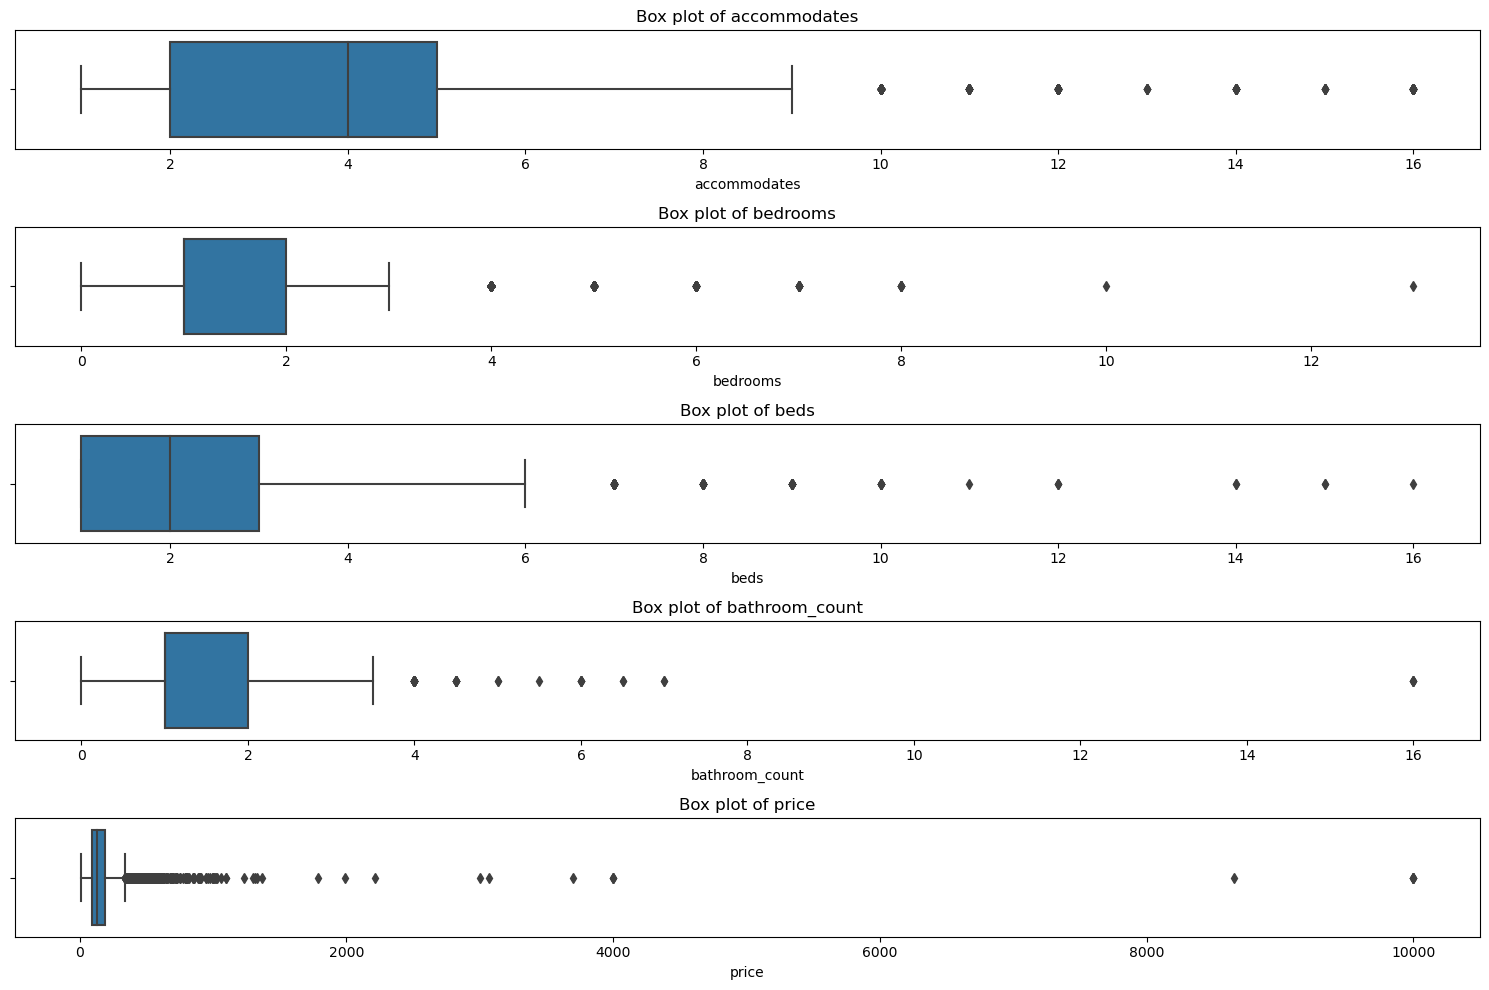

In [62]:
columns_to_plot = ['accommodates', 'bedrooms', 'beds', 'bathroom_count', 'price']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1) 
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

### **Remove outlier for price**

In [63]:
df = df[df['price'] <= 4000]

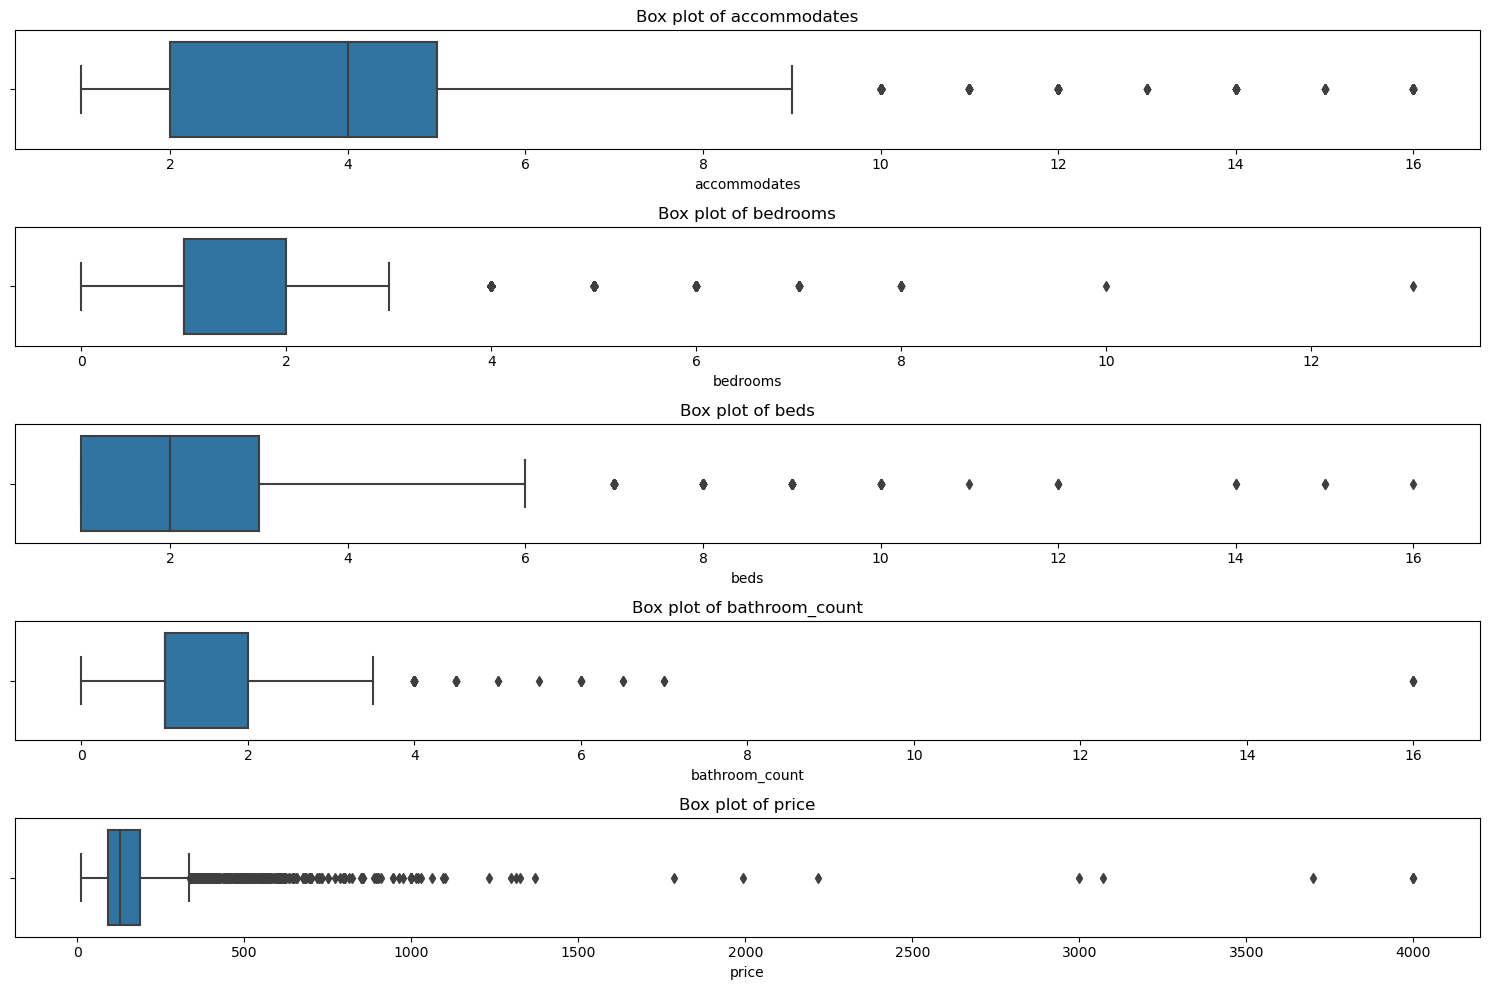

In [64]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1) 
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

## **Process data for regression**

### **see the correlation between features by visualization**

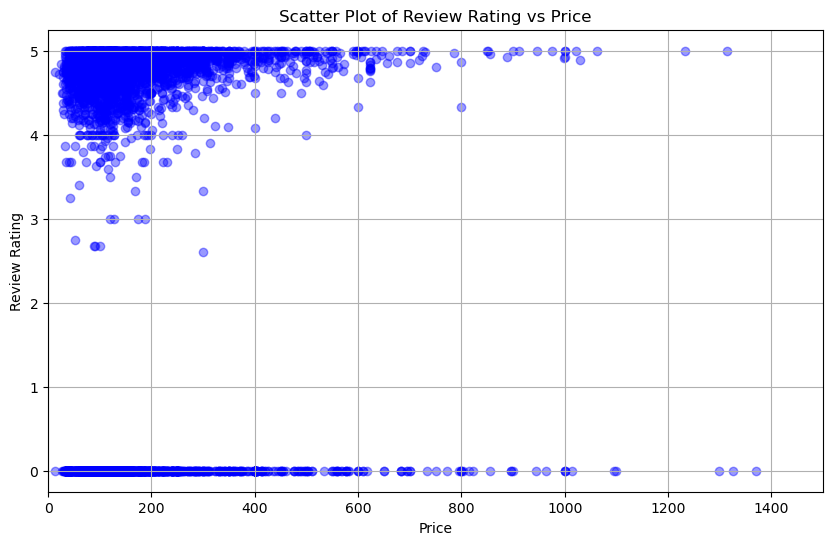

In [65]:
# Extract the 'review_rating' and 'price' columns
review_rating = df['review_rating']
price = df['price']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(price, review_rating, color='blue', alpha=0.4) 
plt.title('Scatter Plot of Review Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Review Rating')
plt.grid(True)
plt.xlim(0, 1500)
plt.show()

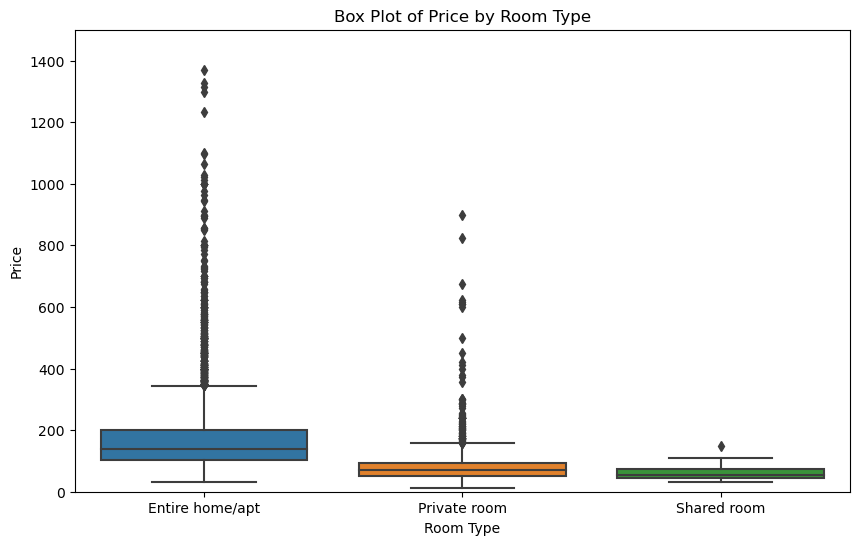

In [66]:
# Create a box plot for 'room_type' and 'price'
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Box Plot of Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1500)
plt.show()

The average price: entire home/apt > private room > shared room.

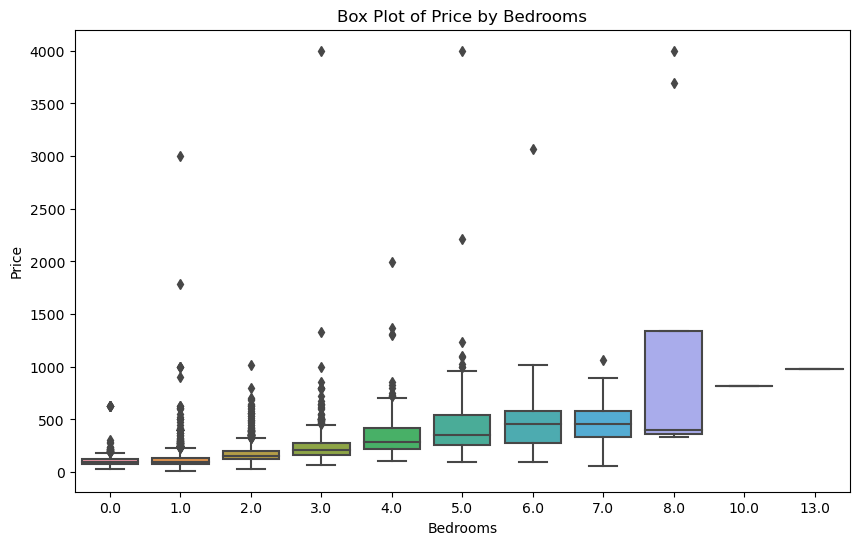

In [67]:
# Create a box plot for 'bedrooms' and 'price'
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Box Plot of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

The more bedrooms, the more expensive the price overall.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6474 entries, 0 to 6881
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6474 non-null   int64  
 1   name                    6474 non-null   object 
 2   neighbourhood_cleansed  6474 non-null   object 
 3   latitude                6474 non-null   float64
 4   longitude               6474 non-null   float64
 5   property_type           6474 non-null   object 
 6   room_type               6474 non-null   object 
 7   accommodates            6474 non-null   int64  
 8   bathrooms_text          6474 non-null   object 
 9   bedrooms                6474 non-null   float64
 10  beds                    6474 non-null   float64
 11  price                   6474 non-null   float64
 12  bathroom_count          6474 non-null   float64
 13  bathroom_type           6474 non-null   object 
 14  room_type_numeric       6474 non-null   int64

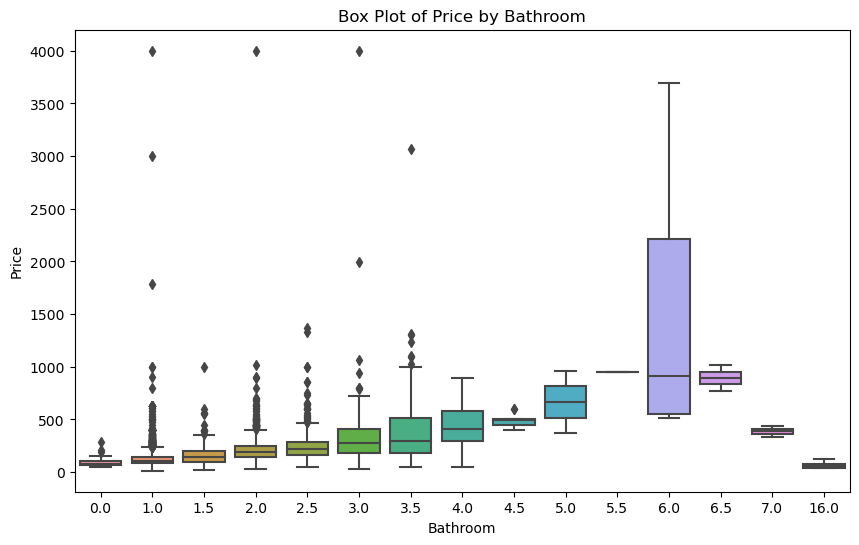

In [69]:
# Create a box plot for 'bathroom_count' and 'price'
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='bathroom_count', y='price', data=df)
plt.title('Box Plot of Price by Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

The more bathrooms, the more expensive in average.

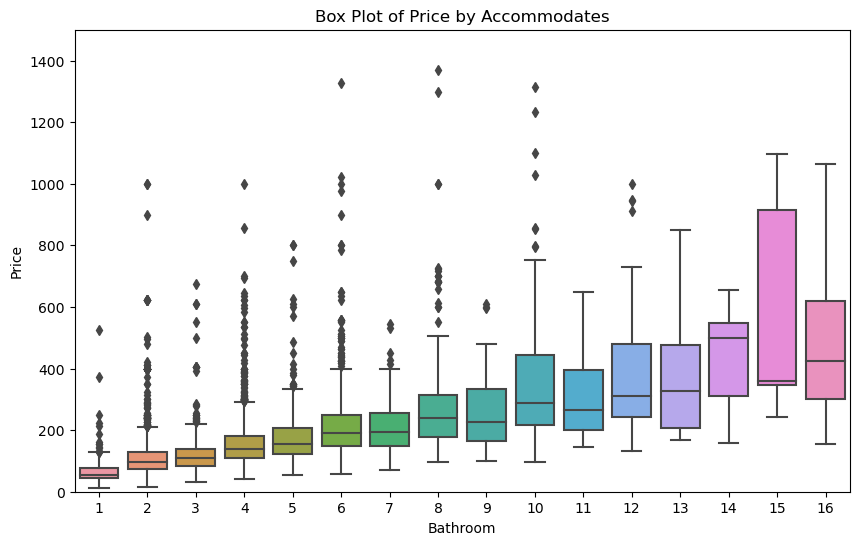

In [70]:
# Create a box plot for 'accommodates' and 'price'
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='accommodates', y='price', data=df)
plt.title('Box Plot of Price by Accommodates')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.ylim(0, 1500)
plt.show()

Overall, the more accomodates, the more expensive.

In [71]:
# Create a SLU subset to see this area
df_slu = df[df['neighbourhood_cleansed'] == 'South Lake Union']
df_slu.head()

,id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,bathroom_count,bathroom_type,room_type_numeric,review_rating
1201,20696304,Loft in Seattle · ★4.97 · 1 bedroom · 2 beds ·...,South Lake Union,47.62171,-122.33888,Entire loft,Entire home/apt,4,1.5 baths,1.0,2.0,153.0,1.5,standard,0,4.97
1235,21175123,Townhouse in Seattle · ★4.94 · 2 bedrooms · 2 ...,South Lake Union,47.63604,-122.32856,Entire townhouse,Entire home/apt,8,2 baths,2.0,2.0,319.0,2.0,standard,0,4.94
1380,23486764,Loft in Seattle · 4 bedrooms · 1 bed · 4.5 baths,South Lake Union,47.61909,-122.33536,Private room in loft,Private room,4,4.5 baths,4.0,1.0,450.0,4.5,standard,1,0.00
2032,36770186,Condo in Seattle · ★4.90 · 1 bedroom · 2 beds ...,South Lake Union,47.61864,-122.34585,Entire condo,Entire home/apt,4,1.5 baths,1.0,2.0,132.0,1.5,standard,0,4.90
2088,38213184,Serviced apartment in Seattle · 1 bedroom · 1 ...,South Lake Union,47.61910,-122.33653,Entire serviced apartment,Entire home/apt,2,1 bath,1.0,1.0,122.0,1.0,standard,0,0.00


### **Multiple Linear Regression (MLR) Model**

In [72]:
# Select one feature and target variable
X = df_slu[['accommodates','bedrooms', 'bathroom_count', 'room_type_numeric', 'review_rating']]
y = df_slu['price']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# trainning and prediction
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
lr_pred = model.predict(X_test)

In [75]:
# Evaluate the model
mse = mean_squared_error(y_test, lr_pred, squared=False)
mae = mean_absolute_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

print("Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
MSE: 72.00871963693476
MAE: 35.865185782206666
R-squared: 0.08194699707353048


### **Gradien Boosting Model**

In [76]:
# Select one feature and target variable
X = df_slu[['accommodates','bedrooms', 'bathroom_count', 'room_type_numeric', 'review_rating']]
y = df_slu['price']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on testing data
gb_predictions = gb_model.predict(X_test)

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, gb_predictions, squared=False)
mae = mean_absolute_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)

print("Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
MSE: 72.57821199847973
MAE: 36.11183515370301
R-squared: 0.06736844063800862


In [79]:
# Combining neighbourhood, convert categorical data into boolean and remove not nessesary data

df_encoded = df.copy()

categorical_columns = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bathroom_type']

for column in categorical_columns:
    
    dummies = pd.get_dummies(df[column], prefix=column)

    df_encoded = pd.concat([df_encoded, dummies], axis=1)

In [80]:
columns_to_drop = ['id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
                   'property_type', 'room_type', 'bathrooms_text', 'bathroom_type']

df_encoded = df_encoded.drop(columns=columns_to_drop)

In [81]:
df_encoded.head()

,accommodates,bedrooms,beds,price,bathroom_count,room_type_numeric,review_rating,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harbor Island,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Rainier View,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,property_type_Barn,property_type_Boat,property_type_Bus,property_type_Camper/RV,property_type_Casa particular,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire place,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Farm stay,property_type_Houseboat,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in boat,property_type_Private room in bungalow,property_type_Private room in ca

### **Random Forest Model**

In [82]:
X = df_encoded.drop('price', axis=1)  
# X = df_encoded[['accommodates', 'bedrooms', 'beds', 'bathroom_count', 'room_type_numeric', 'review_rating']]
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
# Predict on testing data
rf_predictions = rf_model.predict(X_test)

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, rf_predictions, squared=False)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions) 

print("Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
MSE: 145.47627534153872
MAE: 55.159536024795635
R-squared: -0.06592953234377097


### **Gradien Boosting Model with encoded dataframe**

In [86]:
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on training data
gb_model.fit(X_train, y_train)

# Predict on testing data
gb_predictions2 = gb_model.predict(X_test)

In [88]:
# Evaluate the model
mse = mean_squared_error(y_test, gb_predictions2, squared=False)
mae = mean_absolute_error(y_test, gb_predictions2)
r2 = r2_score(y_test, gb_predictions2)

print("Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

Evaluation Metrics:
MSE: 128.93342111220934
MAE: 54.62571481723134
R-squared: 0.16271143280451372
